In [156]:
import pandas as pd
import numpy as np
from PIL import Image
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS

分析豆瓣电影top250的一句话评论，观察经常出现哪些高频词汇。

In [157]:
filepath ="doubanMovies.xlsx"
data = pd.read_excel(filepath)

In [158]:
comments = data.Comment
comments.to_csv('comments.txt',index=None)
f = open('comments.txt','r').read()
worddict = {}

In [159]:
# 利用jieba进行中文分词
result = list(jieba.cut(f))
for item in result:
    if len(item)>1:
        previous_count = worddict.get(item,0)
        worddict[item] = previous_count+1
# 按数量进行排序
worddict = sorted(worddict.items(),key=lambda item:item[1], reverse=True)

In [160]:
words = dict(worddict[:100])

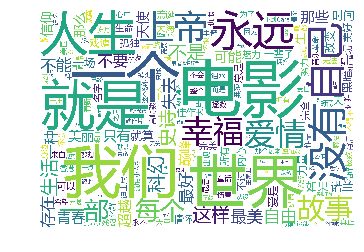

In [164]:
# 将微软雅黑字体配置在当前路径下，图片的大小用width和height控制
wordcloud = WordCloud(background_color='white',width=2600,height=1800,
                      font_path='msyh.ttf').generate(" ".join(result))
wordcloud.to_file('wordcloud1.jpg')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

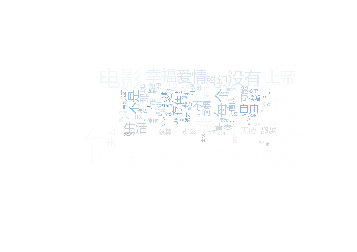

In [167]:
# 选择背景图片时要注意选择颜色对比强的，否则出图效果比较差。下面是个反例。
# 词云图片的大小由原图片控制
image_mask = np.array(Image.open('doubanmovie.jpg'))
imagecolor = ImageColorGenerator(image_mask)

wordcloud = WordCloud(background_color='white',stopwords=STOPWORDS,mask=image_mask,
                      font_path='msyh.ttf',random_state=30).generate(" ".join(result))

wordcloud.recolor(color_func=imagecolor)
wordcloud.to_file('wordcloud2.jpg')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
